# Sockets

In sockets, there are a basic set of protocols that occur on connect. To be setup using WINSOCK or SOCKET (windows and linux respectively)

## Server Side
Initially, the server must be set up before the client tries to connect.

### Socket creation -- socket(addr_fam_spec, type, protocol) 
make a socket
#### addr_fam_spec
Server must open up a port that initializes the socket. addr_fam_spec is the address family specification(AF_INET (IPv4 protocol) , AF_INET6 (IPv6 protocol)), which informs the socket what form of address protocol they are using (layer 3 in OSI model, the Network Layer)
#### type
Informs the socket of what form of communication is being used. The communication type will be used to inform what type of Communication protocol is being used (SOCK_STREAM: 2 way stream, SOCK_DGRAM: datagrams, which are connectionless, unreliable buffers of a fixed (typically small) maximum length, and more) 
#### protocol
Protocol value for Internet Protocol(IP). The numeric identification of the upper layer protocol that an IP packet should be sent to. The number is stored in the header that is prefixed to an IP packet. (Bluetooth? TCP? UDP?)
#### return-value
Returns a SOCKET DESCRIPTOR which is a representation of where the sockets information may be found. In essence, this is like a file descriptor, or how an open file object can know where to read and write to when called in the form of a stream. The other option is some indication of error (usually -1) where the errno is set or wsagetlasterror is set, which can subsequently recieve the info.

### Configure options -- setsockopt(int sockfd, int level, int optname, const void \*optval, socklen_t optlen)
Set options for the socket (optional)
#### sockfd 
sockfd is the socket file descriptor (see above, Socket creation return value)
#### level
The "level" at which a socket opt is defined. See here: https://docs.microsoft.com/en-us/windows/win32/api/winsock/nf-winsock-setsockopt or https://pubs.opengroup.org/onlinepubs/009695399/functions/setsockopt.html for more info on sockopt level or 
#### optname
The option name to be set at this current level
#### optval
The option value to be set to the optname
#### optlen 
The length of the buffer optval points to

### bind socket -- int bind(int sockfd, const struct sockaddr \*addr, socklen_t addrlen);
bind the socket to the correct address and config
#### sockfd
sockfd is the socket file descriptor (see above, Socket creation return value)
#### addr
addr is the pointer to a struct called addrinfo, which can be found via getaddrinfo (https://en.wikipedia.org/wiki/Getaddrinfo). This struct contains info on hostname (127.0.0.1 by default when not set (NULL)), service (port number/service name), hints (another addrinfo when needed or NULL), res (pointer to another addrinfo with info requested after success
#### addrlen 
Lenghth of the object addr points to

### listen -- listen(int sockfd, int backlog)
Put in a temporary stasis status where we wait for a socket to be approached.
#### sockfd
It has a sockfd which is the socket it listens on to wait for connection (see above, Socket creation return value)
#### backlog
Defines the maximum length to which the queue of pending connections for sockfd may grow

### accept -- accept(int sockfd, struct sockaddr \*addr, socklen_t \*addrlen)
Accept a socket at the top of the listen stack and creates a socket to listen to it
#### sockfd 
The sockfd where the socket listens on to wait for connection (see above, Socket creation return value)
#### addr 
An addrinfo structure on the accepted connection info (see addr in bind)

> send/recv here afterwards using the accepted socket

## Client side
Client will conenct at the listen stage with info on where it is connecting to on which port.
### socket - (see above)
see above

### connect -- connect(int sockfd, const struct sockaddr \*addr, socklen_t addrlen)
Open a connection based on the addr info passed. The server that is created must be at the listen stage, where it is listening for the info
#### sockfd
sockfd is the socket file descriptor that exists that will be connected (see above, Socket creation return value)
#### addr
addr is the addrinfo pointer (see above, addr in bind)

>send recv here afterwards with the accepted socket

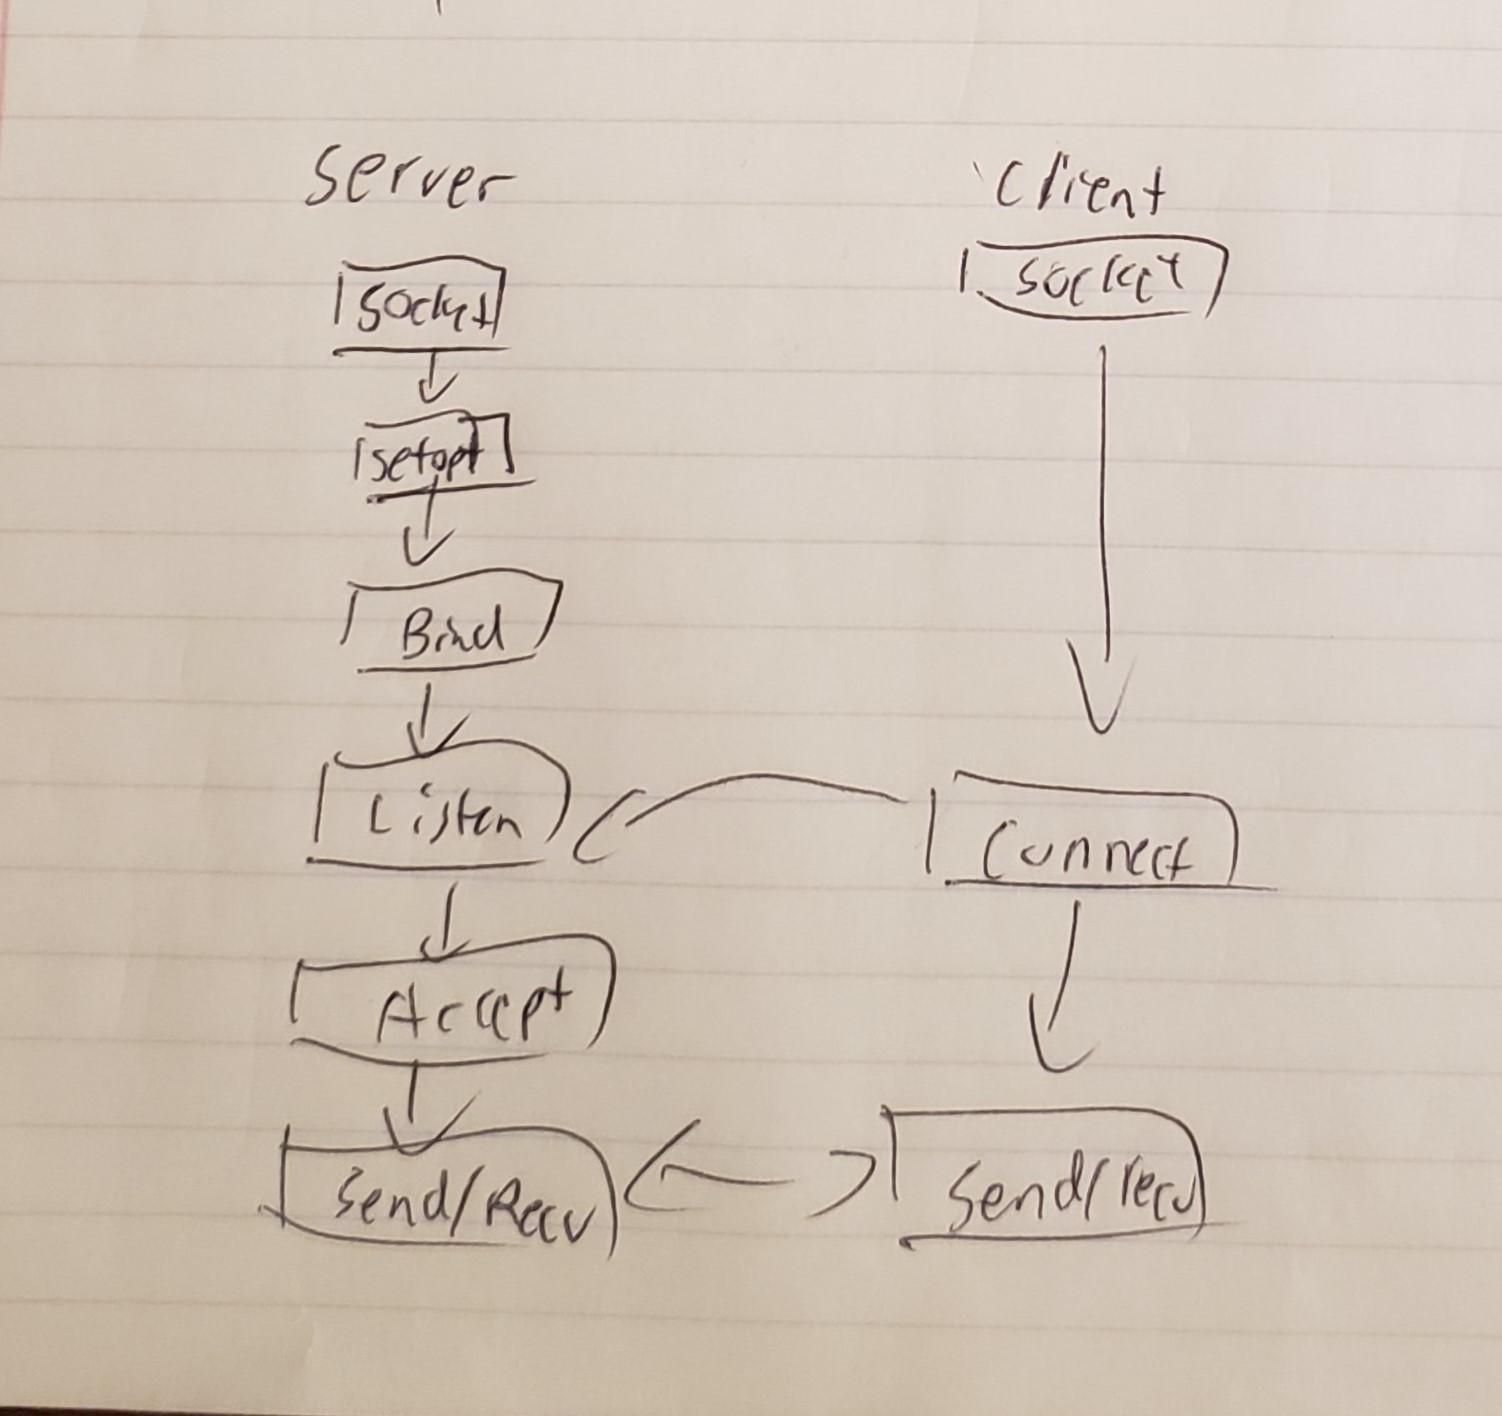

In [1]:
from IPython.display import Image
Image("./Sockets.jpg")

# Communication
## TCP 
To handshake/initiate communication, TCP requires a 3 way handshake between the two connections to esatablish a clear connection between the two points. To do so, there is a series of handshakes needing to occur.

1. The server listens to the incoming transmitions, hoping to connect to csome requesting client
2. The client sends a request with a synch number that informs this message is in the correct order
2. The server recieves the message, and returns an aknowledgement with a slightly incremented number to show it is later on in the message chain. 

This is called a 3 step handshake, there are others, but sockets use TCP/IP with the client/server connection

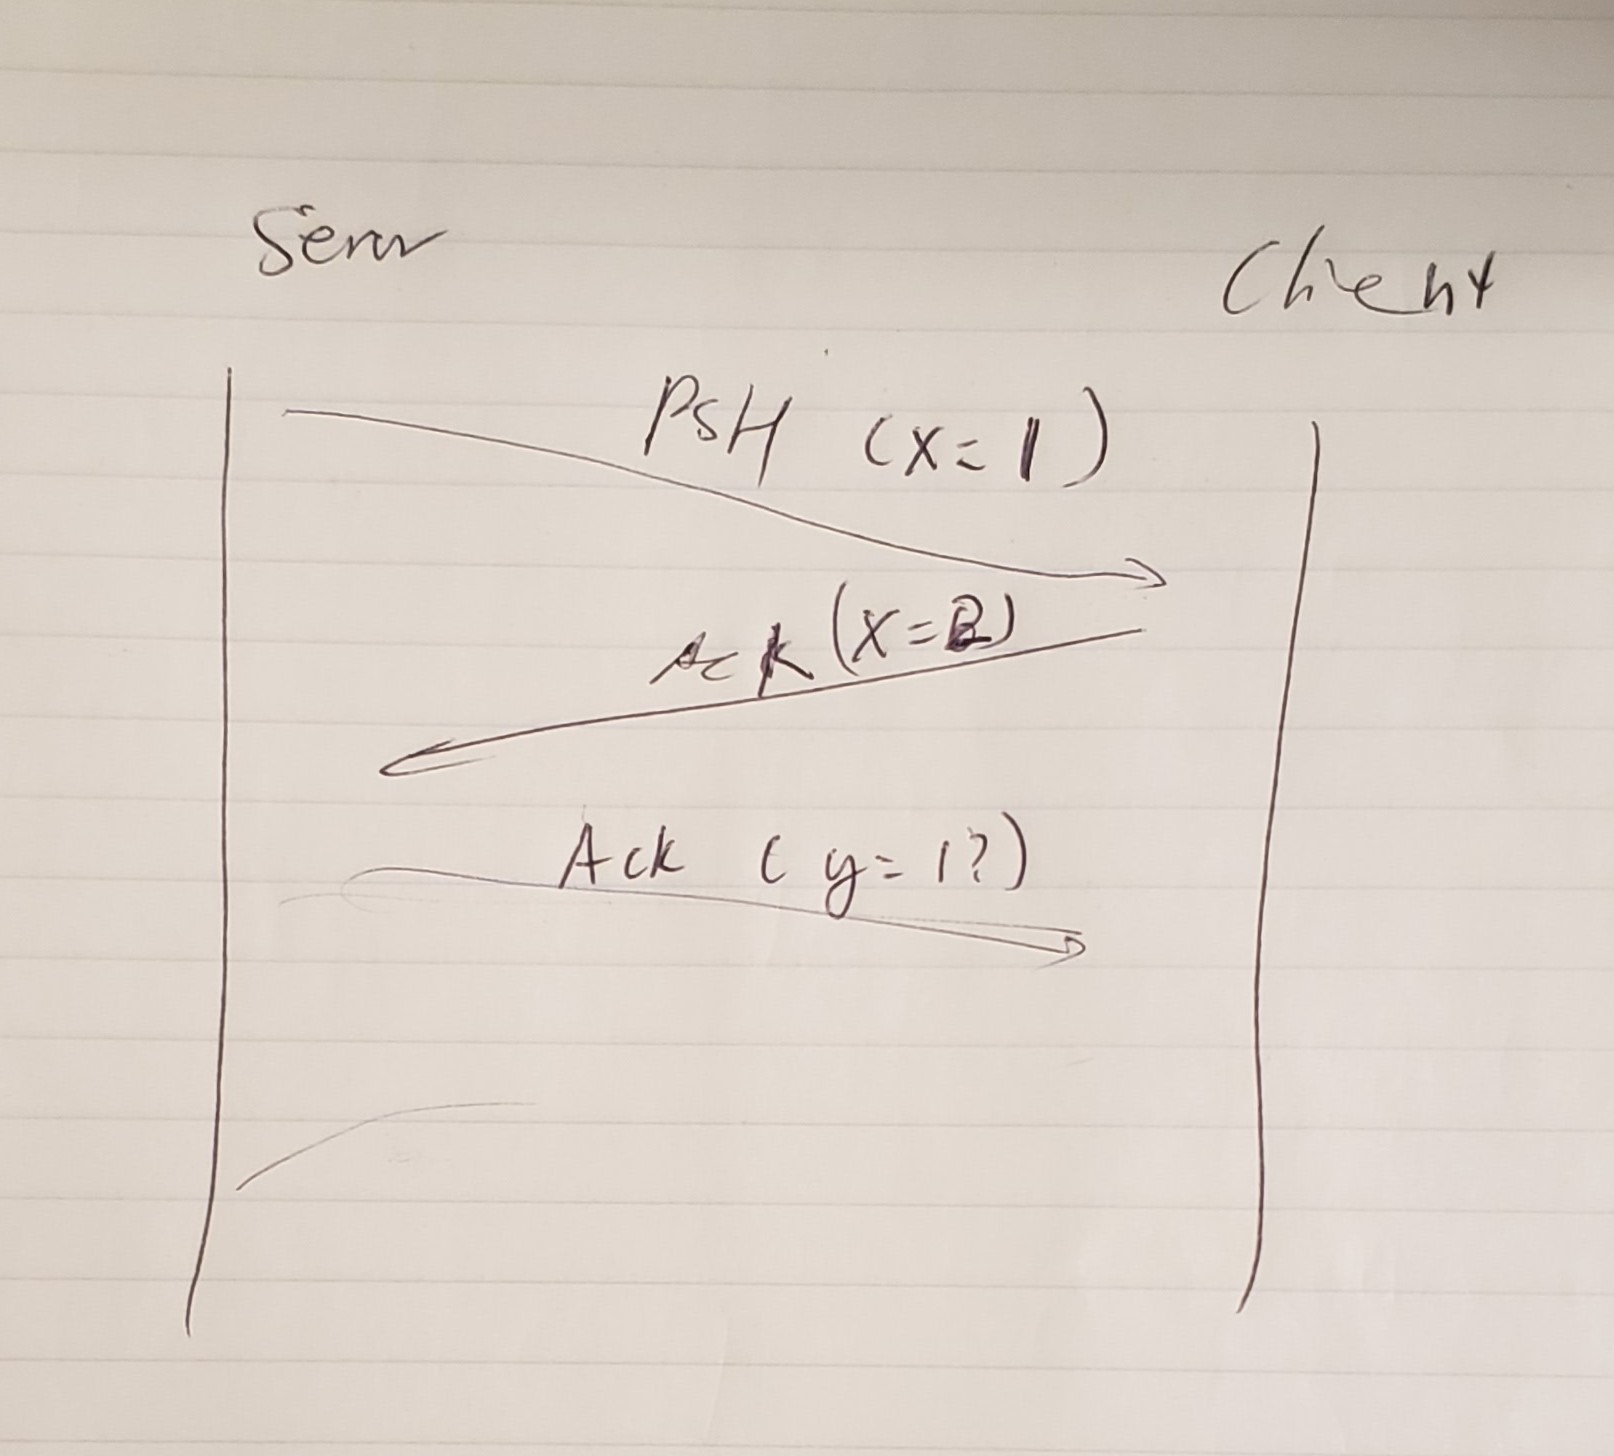

In [2]:
from IPython.display import Image
Image("./Tcp.jpg")

# Socket Errors
https://www.man7.org/linux/man-pages/man2/socket.2.html -- Linux  
https://docs.microsoft.com/en-us/windows/win32/winsock/windows-sockets-error-codes-2 -- Windows  
## Error Codes (windows)
Message code is either retruned in some functions or set to WSAgetLastError to retrieve the information about the error
### WSAENOTSOCK
Code : 10038  
Socket operation on nonsocket.   
An operation was attempted on something that is not a socket. Either the socket handle parameter did not reference a valid socket, or for select, a member of an fd_set was not valid.   
  
  
Ocurred when Sockets was bound to the wrong socket descriptor (bind(-1 , ...))  
Occured when listen was improperly set (listen(-1, ...))    
Occured when accept was improperly set (accept(-1, ...))  
Occured when send socket is improperly set (send(-1, ...))
Occured when shutdown on a socket that does not exist (-1)
Occured when the buflen was improperly configured for recv (different size of the buffer)


### WSAEFAULT
10014  
Bad address.  
The system detected an invalid pointer address in attempting to use a pointer argument of a call. This error occurs if an application passes an invalid pointer value, or if the length of the buffer is too small. For instance, if the length of an argument, which is a sockaddr structure, is smaller than the sizeof(sockaddr).

Occurs when namelen of bind (bind(x, y, -1)) is improperly bound.  
Occurs when recvbuf len is not correctly configured (can be send or recv)


### WSAECONNABORTED
10053  
Software caused connection abort.  
An established connection was aborted by the software in your host computer, possibly due to a data transmission time-out or protocol error.  

Occurs when the Server fails, and the connection is aborted (misconfigured the server, which when it failed and the client tried to issue and recieve, sent this error)  

### WSAECONNRESET
10054
Occurs when client cmd-c's escapes which forcefully shuts down the connection.



## Error Codes (Linux)

Message code is either retruned in some functions or set to strerror(errno), use to retrieve info about error made

EACCES 
    Permission to create a socket of the specified type and/or
    protocol is denied.

EAFNOSUPPORT
    The implementation does not support the specified address
    family.

EINVAL 
    Unknown protocol, or protocol family not available.

EINVAL 
    Invalid flags in type.

EMFILE 
    The per-process limit on the number of open file descriptors
    has been reached.

ENFILE 
    The system-wide limit on the total number of open files has
    been reached.

ENOBUFS or ENOMEM
    Insufficient memory is available.  The socket cannot be
    created until sufficient resources are freed.

EPROTONOSUPPORT
    The protocol type or the specified protocol is not supported
    within this domain.

Other errors may be generated by the underlying protocol modules.